#Project Module 2: Derivatives
#CPSMA 4413-01 Dr. Jacob's Numerical Methods
Reed Barker and Seth Jensen

##First, we will be estimating derivatives:

Below is our function used for computing the forward difference, backward difference, and the central difference as well

Forward:  
$
f'(x) = \frac{f(x+h) - f(x)}{h}
$

Backward:  
$
f'(x) = \frac{f(x) + f(x - h)}{h}
$

Center:  
$
f'(x) = \frac{f(x+h) + f(x - h)}{2h}
$

x: 1
h: 1
f(x) = x + x**3
f(1) = 2
Central Difference

f'(x) = ( f( x + h ) - f( x - h ) ) / ( 2 * h )
f'(x) = ( f( 1 + 1 ) - f( 1 - 1 ) ) / ( 2 * 1 )
f'(x) = ( 10 - 0 ) / ( 2 * 1 )
f'(x) = 5.0


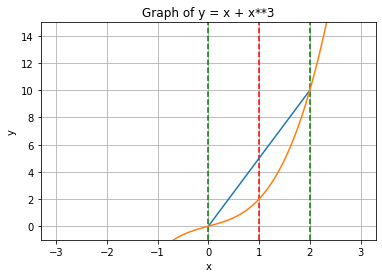

In [354]:
import matplotlib.pyplot as plt
import numpy as np

x = 1 #@param {type:"number"}
h = 0.5 #@param {type:"number"}
diff_Option = 'Central Difference' #@param ["Forward Difference", "Backward Difference", "Central Difference"]
equationString = "x + x**3" #@param ["3 * x**3 + 4 * x**2 + 3", "6 * x**2 + 2 * x + 8", "(2 + x**8)**(1/2)"] {allow-input: true}
equation = eval(equationString)

#-----------------------------------------------------------------------

print("x:", x)
print("h:", h)
print("f(x) =", equationString)
print(f"f({x}) =".format(), equation)

#-----------------------------------------------------------------------

def f(input):
  x = input
  equation = eval(equationString)
  return equation

#-----------------------------------------------------------------------

if diff_Option == "Forward Difference":
  print("Forward Difference\n")

  print("f'(x) = f( x + h ) - f( x ) ) / h")
  print("f'(x) = f( {} + {} ) - f( {} ) ) / {}".format(x, h, x, h))
  print("f'(x) = ( {} - {} ) / {}".format(f(x + h), f(x), h))
  print("f'(x) =", ( f(x + h) - f(x) ) / h)

  plt.axvline(x, color='r', linestyle='--') # Vertical line at x
  plt.axvline(x+h, color='g', linestyle='--') # Vertical line at x+h
  plt.plot([x, x+h], [f(x), f(x + h)])

elif diff_Option == "Backward Difference":
  print("Backward Difference\n")

  print("f'(x) = ( f( x ) - f( x - h ) ) / h)")
  print("f'(x) = ( f( {} ) - f({} - {}) ) / {})".format(x, x, h, h))
  print("f'(x) = ( {} - {} ) / {}".format(f(x), f(x - h), h))
  print("f'(x) =", ( f( x ) - f(x - h) ) / h)

  plt.axvline(x, color='r', linestyle='--') # Vertical line at x
  plt.axvline(x-h, color='g', linestyle='--') # Vertical line at x-h
  plt.plot([x, x-h], [f(x), f(x - h)])

elif diff_Option == "Central Difference":
  print("Central Difference\n")


  print("f'(x) = ( f( x + h ) - f( x - h ) ) / ( 2 * h )")
  print("f'(x) = ( f( {} + {} ) - f( {} - {} ) ) / ( 2 * {} )".format(x, h, x, h, h))
  print("f'(x) = ( {} - {} ) / ( 2 * {} )".format(f( x + h ), f( x - h ), h))
  print("f'(x) =", ( f(x + h) - f(x - h) ) / (2*h))

  plt.axvline(x, color='r', linestyle='--') # Vertical line at x
  plt.axvline(x+h, color='g', linestyle='--') # Vertical line at x+h
  plt.axvline(x-h, color='g', linestyle='--') # Vertical line at x-h
  plt.plot([x+h, x-h], [f(x + h), f(x - h)])

else:
  print("Error")

#-----------------------------------------------------------------------

linespace = np.linspace(-3, 3, 200) # (-x, +x, resolution)
plt.ylim(-1, 15) # limits y axis from and to (-y, +y)
y = np.vectorize(f)(linespace)

plt.plot(linespace, y)              # Plotting the equation

plt.title("Graph of y = {}".format(equationString))  # Adding a title
plt.xlabel("x")             # Labeling the x-axis
plt.ylabel("y")             # Labeling the y-axis
plt.grid()                  # Adding a grid
plt.show()                  # Displaying the plot

###Below is the function of choice for computing the finite difference of our second order derivative:


$f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}$

###Consider the continuous function f and center used in Project Module 1. Apply these approximations for at least 5 different values for step size and compare to actual value in table form. Compute absolute and relative error of each approximation.

##Create a process for performing Lagrange interpolation.

###Using f from Project Module 1 and the points (center, f(center)), (center + 0.1, f(center + 0.1)), and (2center, f(2center)), create a Lagrange Interpolation.

In [365]:
center = 0.75
xVals = [center + 0.1, center + 0.2, center * 2]
fOFxVals = []
fPrimeOFxVals = []
equationString = "0.1*x + 0.25*x**3" #"3 * x**3 + 4 * x**2 + 3"
equation = eval(equationString)

#-----------------------------------------------------------------------

def f(input):
  x = input
  equation = eval(equationString)
  return equation

for i in range(len(xVals)):
  print("Central Difference: f'({}) =".format(xVals[i]), ( f(center + xVals[i]) - f(center - xVals[i]) ) / (2*xVals[i]))

  fOFxVals.append( f(xVals[i]) )

  fPrimeOFxVals.append(( f(center + xVals[i]) - f(center - xVals[i]) ) / (2*xVals[i]))

print("center:", xVals)
print("f(center):", fOFxVals)
print("f'(center):", fPrimeOFxVals)

#-----------------------------------------------------------------------

sum = 0

n = len(xVals)
for i in range(n):
  
  jloop = 1
  jloop *= fOFxVals[i]
  for j in range(n):
    if j != i:
      #print("( t-t{} )".format(j), "/", "( t{}-t{} )".format(i, j), end=" * ")
      print("( {}-{} )".format(center, xVals[j]), "/", "( {}-{} )".format(xVals[i], xVals[j]), end=" * ")
      jloop *= (center - xVals[j]) / (xVals[i] - xVals[j])
  
  sum += jloop

  if i != n-1:
    print(fOFxVals[i], "+")
  else:
    print(fOFxVals[i])

  print("jloop", jloop)
print("sum", sum)

Central Difference: f'(0.85) = 0.7025000000000001
Central Difference: f'(0.95) = 0.7474999999999999
Central Difference: f'(1.5) = 1.084375
center: [0.85, 0.95, 1.5]
f(center): [0.23853124999999997, 0.30934375, 0.99375]
f'(center): [0.7025000000000001, 0.7474999999999999, 1.084375]
( 0.75-0.95 ) / ( 0.85-0.95 ) * ( 0.75-1.5 ) / ( 0.85-1.5 ) * 0.23853124999999997 +
jloop 0.5504567307692306
( 0.75-0.85 ) / ( 0.95-0.85 ) * ( 0.75-1.5 ) / ( 0.95-1.5 ) * 0.30934375 +
jloop -0.4218323863636363
( 0.75-0.85 ) / ( 1.5-0.85 ) * ( 0.75-0.95 ) / ( 1.5-0.95 ) * 0.99375
jloop 0.055594405594405566
sum 0.1842187499999999


###Compute the absolute and relative error for the interpolation at center + 0.2

Absolute error is the difference between the exact value and the approximate value:

Absolute error = | exact value - approximate value |

On the other hand, relative error is the ratio of the absolute error to the exact value:

Relative error = | exact value - approximate value | / | exact value |

f(x) = 0.1*x + 0.25*x**3

f'(x) = 0.1 + 0.75x^2

f'(center + 0.2) = 0.1 + 0.75(center + 0.2)^2

f'(0.95) = 0.776875

In [386]:
x = center+0.2
h = 0.005 
center = 0.75
xVals = [center, center + 0.1, center * 2]
fOFxVals = []
fPrimeOFxVals = []
equationString = "0.1*x + 0.25*x**3" #"3 * x**3 + 4 * x**2 + 3"
equation = eval(equationString)

#-----------------------------------------------------------------------

def f(input):
  x = input
  equation = eval(equationString)
  return equation

approx = ( f(x + center) - f(x - center) ) / (2*x)
exact = 0.1 + 0.75*(0.95)**2.0

print("Central Difference: f'({}) =".format(x), approx)

print("Exact Value:", exact)

#-----------------------------------------------------------------------

print("Absolute error = | exact value - approximate value | =", abs(exact - approx) )
print("Relative error = | exact value - approximate value | / | exact value | =", abs( exact - approx ) / abs( exact ) ) 

Central Difference: f'(0.95) = 0.7243421052631578
Exact Value: 0.776875
Absolute error = | exact value - approximate value | = 0.052532894736842195
Relative error = | exact value - approximate value | / | exact value | = 0.06762078164034394


###Compute the absolute and relative error for the second derivative of the interpolation at center + 0.2.

f(x) = x + x^3

f'(x) = 1 + 3x^2

f''(x) = 6x



In [392]:
center = 0.75
x = center+0.2
h = 0.005 
equationString = "0.1*x + 0.25*x**3" #"3 * x**3 + 4 * x**2 + 3"
equation = eval(equationString)

#-----------------------------------------------------------------------

def f(input):
  x = input
  equation = eval(equationString)
  return equation

approx = ( f(center + 0.2) - f(center) + f(center - 0.2) ) / (x - center) ** 2
exact = 6*(0.95)

print("Central Difference: f'({}) =".format(x), approx)

print("Exact Value:", exact)

#-----------------------------------------------------------------------

print("Absolute error = | exact value - approximate value | =", abs(exact - approx) )
print("Relative error = | exact value - approximate value | / | exact value | =", abs( exact - approx ) / abs( exact ) ) 

Central Difference: f'(0.95) = 5.636718750000003
Exact Value: 5.699999999999999
Absolute error = | exact value - approximate value | = 0.06328124999999662
Relative error = | exact value - approximate value | / | exact value | = 0.011101973684209936


###Graph the interpolation and original function in a window that contains all the above points.


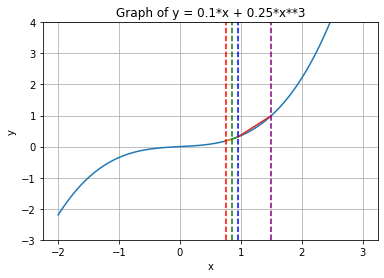

In [357]:
xVals = []
fOFxVals = []

def f(input):
  x = input
  equation = eval(equationString)
  return equation

xVals = [center, center + 0.1, center + 0.2, center * 2]
for i in range(len(xVals)):
  fOFxVals.append( f(xVals[i]) )

linespace = np.linspace(-2, 3, 200) # (-x, +x, resolution)
plt.ylim(-3, 4) # limits y axis from and to (-y, +y)
y = np.vectorize(f)(linespace)

plt.plot(linespace, y)              # Plotting the equation

for i in range(len(xVals)-1):
  plt.plot([xVals[i], xVals[i+1]], [fOFxVals[i], fOFxVals[i+1]])

plt.axvline(xVals[0], color='red', linestyle='--') # Vertical line at xVals[0]
plt.axvline(xVals[1], color='green', linestyle='--') # Vertical line at xVals[1]
plt.axvline(xVals[2], color='blue', linestyle='--') # Vertical line at xVals[2]
plt.axvline(xVals[3], color='purple', linestyle='--') # Vertical line at xVals[3]

plt.title("Graph of y = {}".format(equationString))  # Adding a title
plt.xlabel("x")             # Labeling the x-axis
plt.ylabel("y")             # Labeling the y-axis
plt.grid()                  # Adding a grid
plt.show()                  # Displaying the plot

##What we found:.

###The following is what we found:

> We found that that when taking the second derivative and finding the central, backward, and forward difference, it creates a very precise window and allows you to really see what is going on when graphed. Also, Lagrange interpolation is a very accurate error analysis of a set of data points, or any function that is chosen.



We would say that when approximating the derivative when a continuous function known has some shortcomings in itself. One main one would be the accuracy. The more accurate you want to be, the smaller the intervals have to be, etc. However, one shortcoming of using smaller intervals is the fact that computation time is increased as well. 

###Below is the formula for Lagrange interpolation: 


$f_n(x) = \sum_{i=0}^n L_i(x)f(x_i)$


Overall, the factors in the Lagrange Interpolation weighting function, Li(x), ensure that the chosen polynomial passes through each known point while neglecting any point that is not included in the data. This makes it a very powerful, and fun, tool for approximating a function with only a few known data points. 